In [1]:
import os
import re
import cv2
import sys
import glob
import pandas as pd
import numpy as np
sys.path.append("../table/")
sys.path.append("../")
sys.path.append("../stripes/")

import table
import neighbours
reload(table)
from stripes.palette import targets_dict

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def read_image_with_info(image_name):
    """ .../Samsung_sysmex_inkjet/123123.jpg" -> (image, "samsung", "sysmex", "inkjet", "123123")"""
    assert os.path.isfile(image_name), "File not found"
    
    tokens = re.split("[/_]", image_name)
    ID = tokens[-1][:-12]
    
    device = "None"
    for dv in ["Samsung", "XiaomiB", "XiaomiD"]:
        if dv in tokens:
            device = dv
    
    strip = "None"
    for strp in ["sysmex", "contec"]:
        if strp in tokens:
            strip = strp
    
    printer = "None"
    for prnt in ["laser", "inkjet"]:
        if prnt in tokens:
            printer = prnt
            
    image = cv2.cvtColor(cv2.imread(image_name), cv2.COLOR_BGR2RGB)
    return image, device, strip, printer, ID

In [3]:
import pickle as pkl

with open("compact_table_geometry_sysmex.pkl", "rb") as f:
    table_geometry_sysmex = pkl.load(f)
tabler_sysmex = table.Table(**table_geometry_sysmex)

with open("compact_table_geometry_contec.pkl", "rb") as f:
    table_geometry_contec = pkl.load(f)
tabler_contec = table.Table(**table_geometry_contec)

print(tabler_contec.coords_strip_mm['PH'], tabler_sysmex.coords_strip_mm['PH'])

(((59.0, 0.0), (64.0, 5.0)), ((75.0, 0.0), (80.0, 5.0)))


In [6]:
def crop(img, scale=1.0):
    qwidth, qheight = img.shape[1] / scale, img.shape[0] / scale
    lmargin = (img.shape[1] - qwidth) / 2
    rmargin = img.shape[1] - lmargin
    tmargin = (img.shape[0] - qheight) / 2
    bmargin = img.shape[0] - tmargin
    crop = img[int(np.round(tmargin, 0)): int(np.round(bmargin)), int(np.round(lmargin)): int(np.round(rmargin)), :]
#     print img.shape, (qheight, qwidth), lmargin, rmargin, tmargin, bmargin
    return crop

def get_weighted_manhattan_distance_custom(img1,img2):
    """
    Current state:
    calculate mean values of channels of images img1, img2:
    and then calculate manhattan distance with weights over them.
    weights = [1,5,4] were chosen using grid search 
    (! both images should be in LAB color space !)
    
    Takes as input:
    
    - img1, img2 - numpy 3d arrays 
    
    Returns:
    
    - distance - float, distance between two input images
    """
    weights = [2.,5.,3.]
    
    crop1 = crop(img1, scale=2.3)
    crop2 = crop(img2, scale=2.3)
    
    point1 = np.median(crop1,axis=(0,1))
    point2 = np.median(crop2,axis=(0,1))
    
    d = 0.
    
    for i in xrange(point1.shape[0]):
        d += weights[i]*np.abs(point1[i] - point2[i])
        
    return d

(1/75) Samsung contec inkjet 10114450


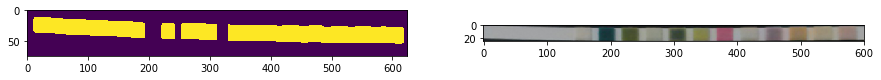

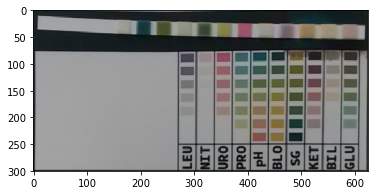

BIL


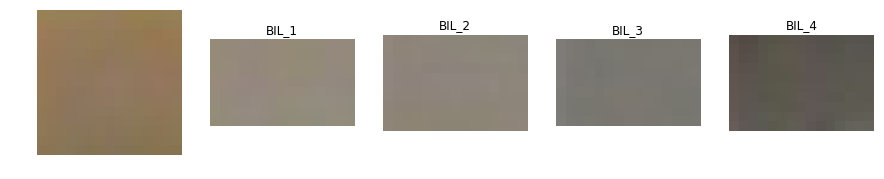

PRO


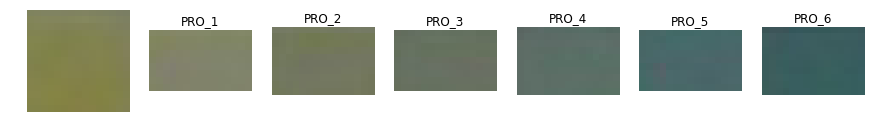

URO


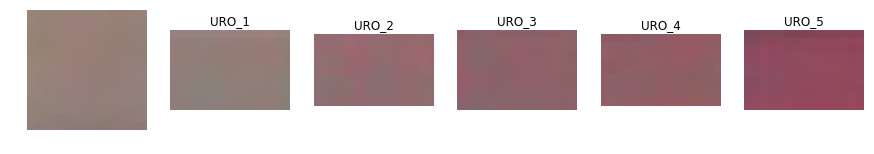

BLO


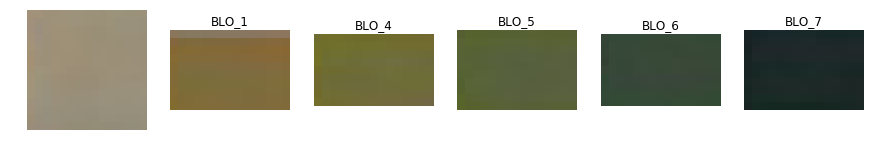

LEU


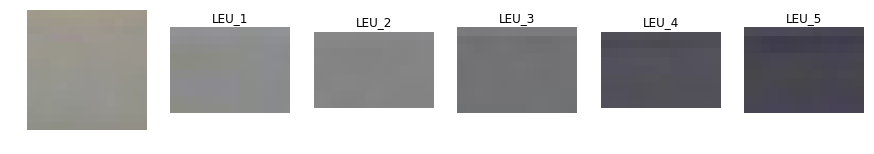

PH


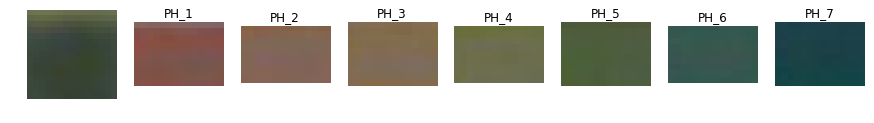

KET


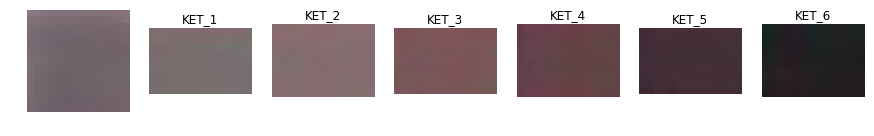

SG


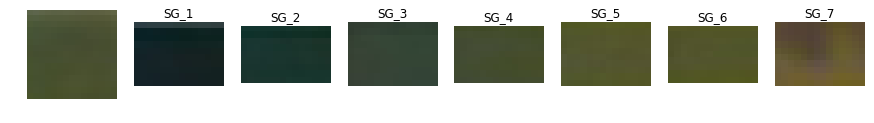

GLU


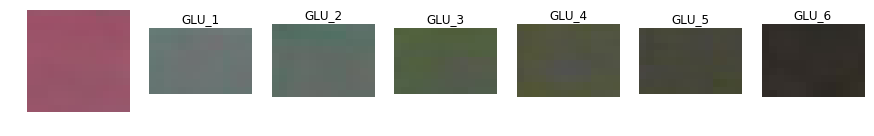

NIT


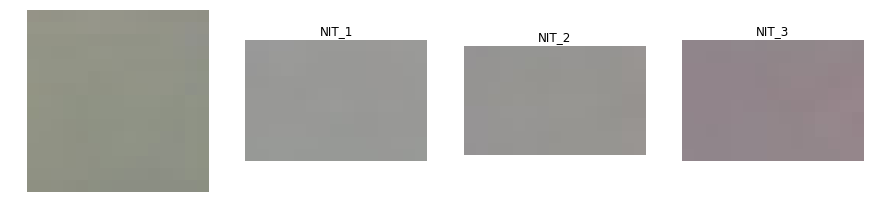

{'BIL': 1, 'PRO': 0, 'URO': 0, 'GLU': 1, 'BLO': 0, 'LEU': 0, 'Template': 'inkjet', 'Strip': 'contec', 'Device': 'Samsung', 'PH': 5, 'KET': 0, 'SG': 3, 'ID': '10114450', 'NIT': 1}
* * * * * * * * * * * * * * * * * * * * * * * * * 
(2/75) Samsung contec inkjet 10114975


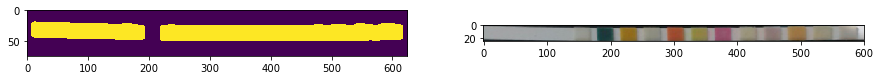

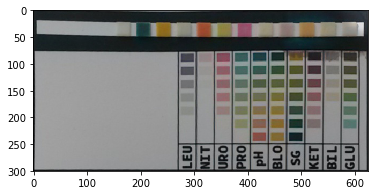

BIL


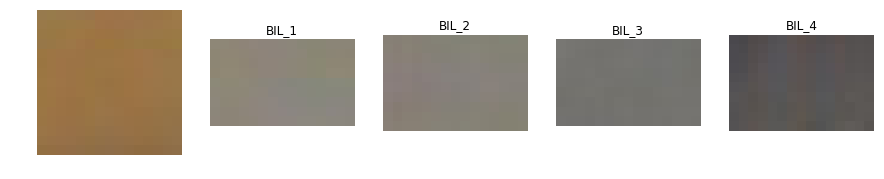

PRO


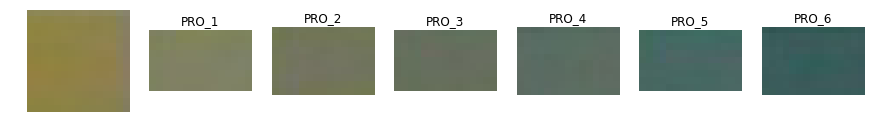

URO


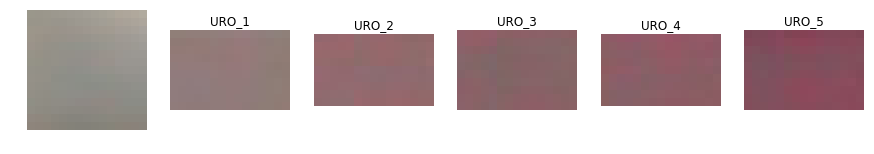

BLO


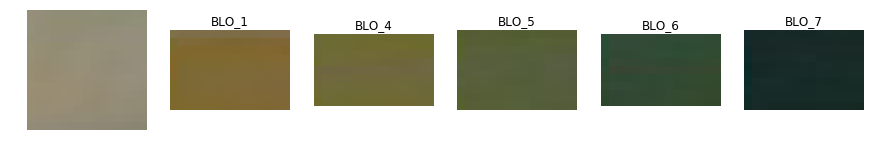

LEU


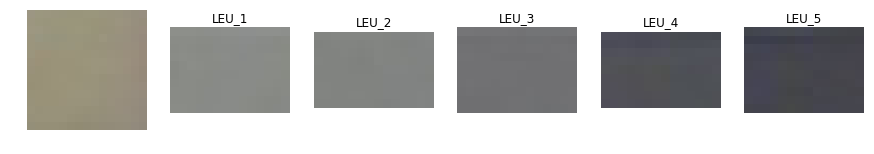

PH


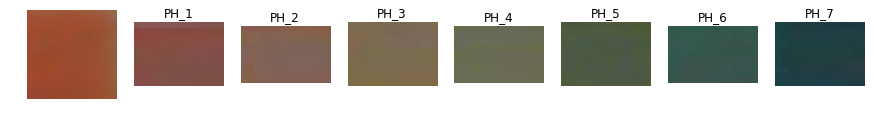

KET


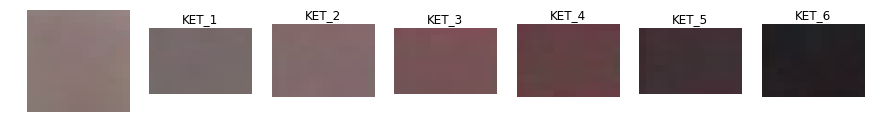

SG


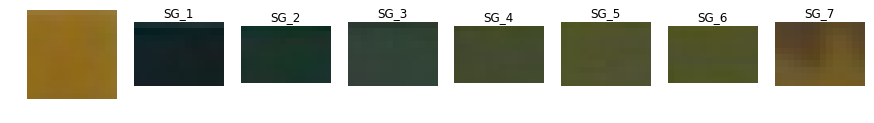

GLU


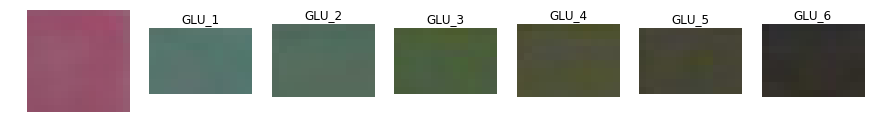

NIT


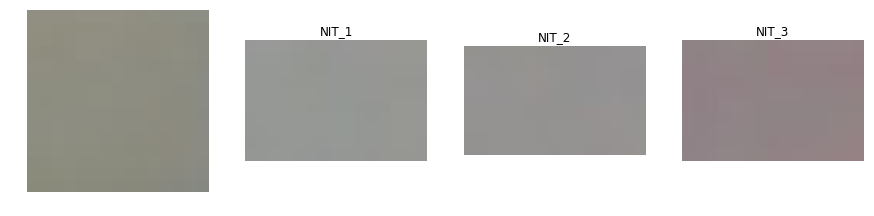

{'BIL': 1, 'PRO': 0, 'URO': 0, 'GLU': 0, 'BLO': 0, 'LEU': 0, 'Template': 'inkjet', 'Strip': 'contec', 'Device': 'Samsung', 'PH': 0, 'KET': 1, 'SG': 6, 'ID': '10114975', 'NIT': 0}
* * * * * * * * * * * * * * * * * * * * * * * * * 
(3/75) Samsung contec inkjet 10115025


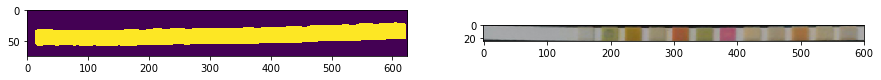

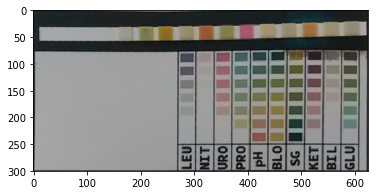

BIL


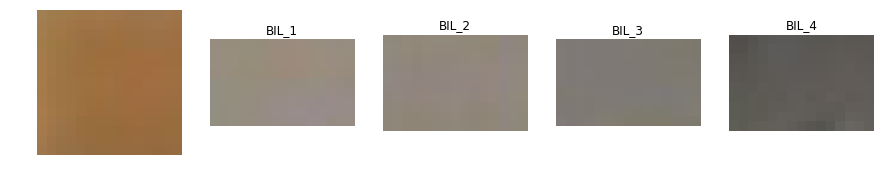

PRO


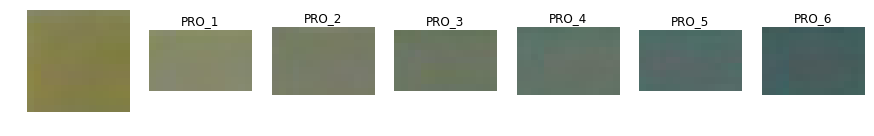

URO


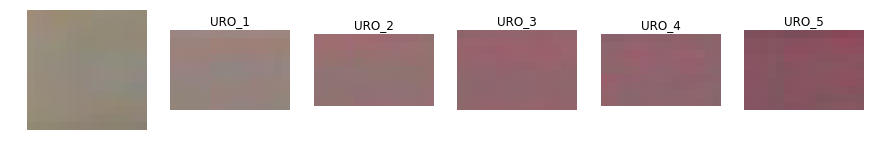

BLO


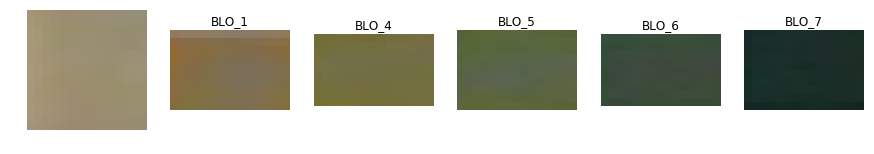

LEU


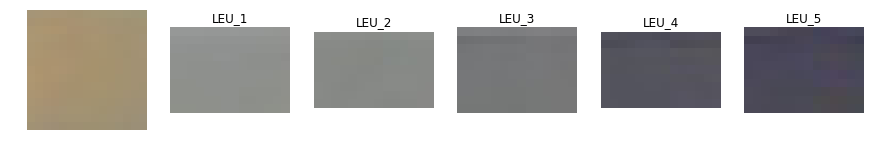

PH


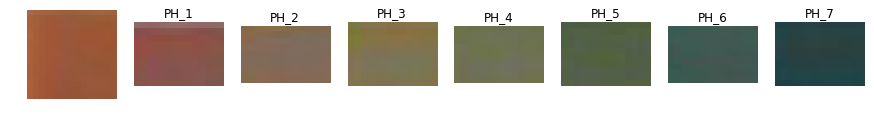

KET


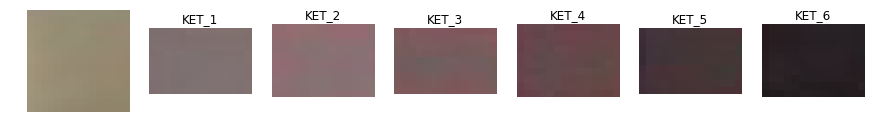

SG


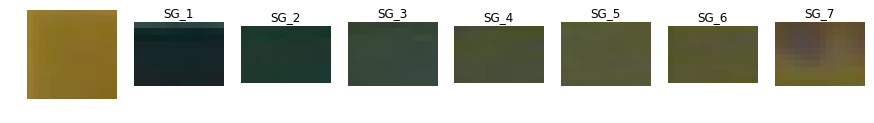

GLU


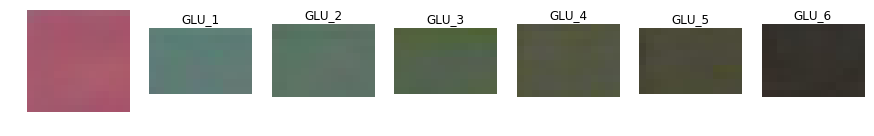

NIT


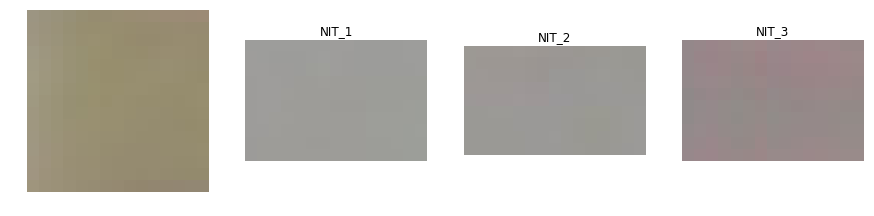

{'BIL': 2, 'PRO': 0, 'URO': 0, 'GLU': 1, 'BLO': 0, 'LEU': 0, 'Template': 'inkjet', 'Strip': 'contec', 'Device': 'Samsung', 'PH': 0, 'KET': 0, 'SG': 6, 'ID': '10115025', 'NIT': 1}
* * * * * * * * * * * * * * * * * * * * * * * * * 
(4/75) Samsung contec inkjet 1


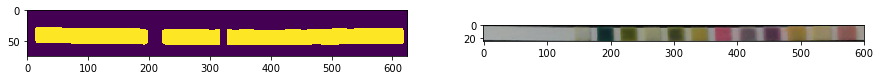

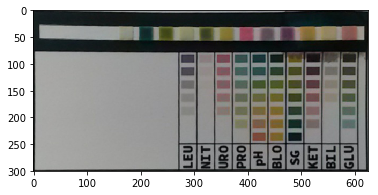

BIL


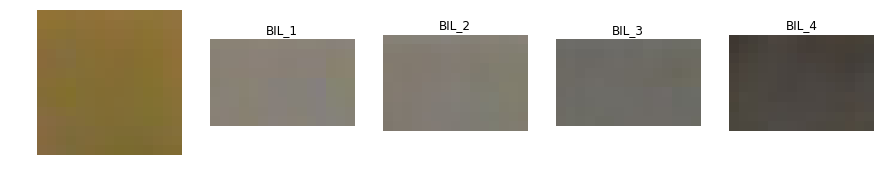

PRO


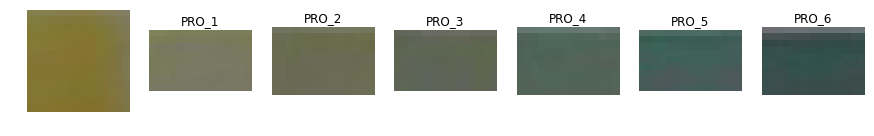

URO


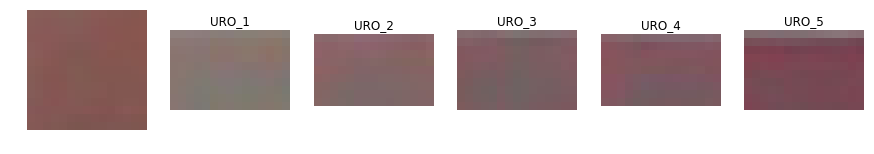

BLO


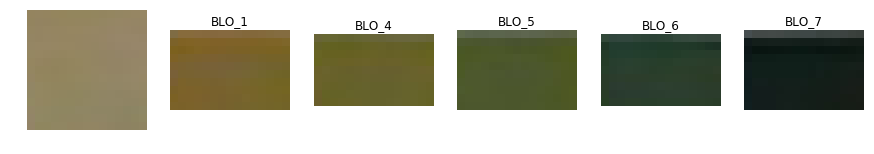

LEU


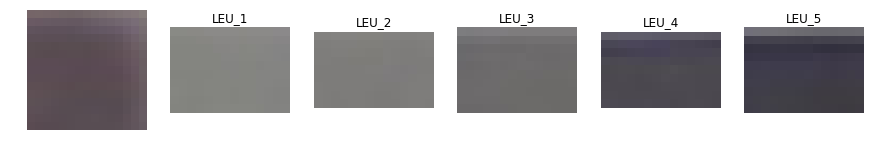

PH


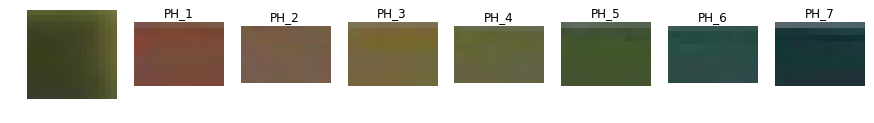

KET


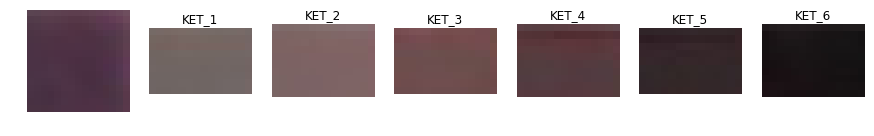

SG


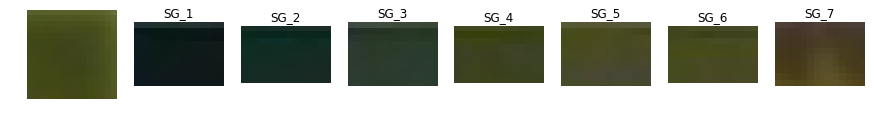

GLU


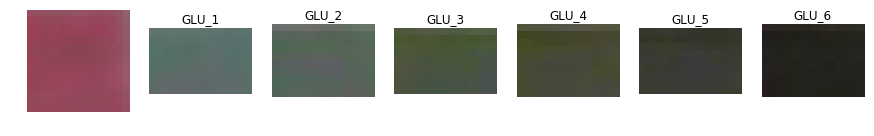

NIT


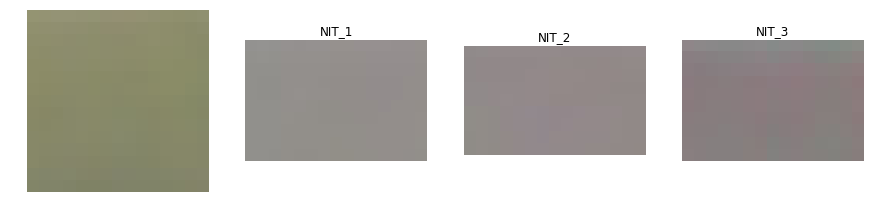

{'BIL': 2, 'PRO': 0, 'URO': 3, 'GLU': 1, 'BLO': 0, 'LEU': 3, 'Template': 'inkjet', 'Strip': 'contec', 'Device': 'Samsung', 'PH': 4, 'KET': 3, 'SG': 5, 'ID': '1', 'NIT': 0}
* * * * * * * * * * * * * * * * * * * * * * * * * 
(5/75) Samsung contec inkjet 30305695


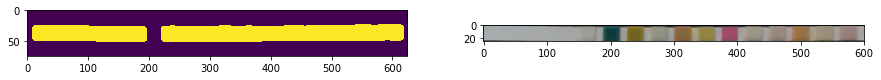

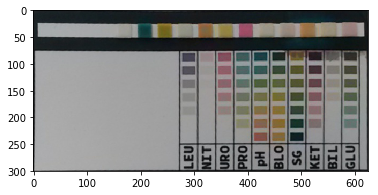

BIL


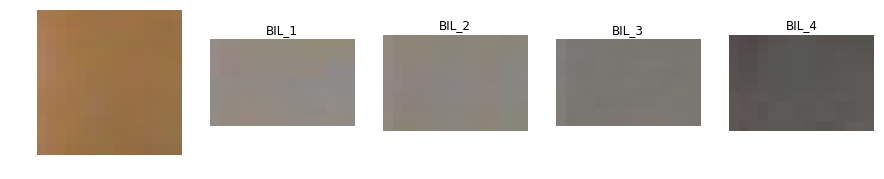

PRO


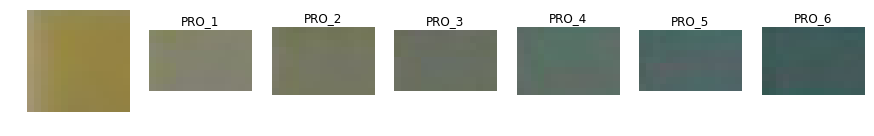

URO


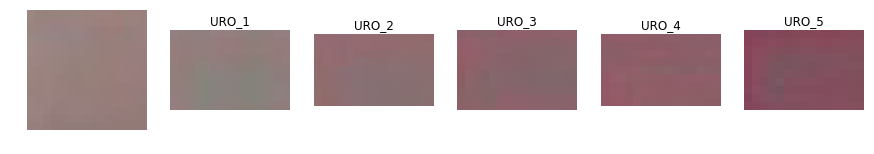

BLO


KeyboardInterrupt: 

In [5]:
data = pd.read_csv("../RealValues.csv", sep=',')
data.head()

image_names = glob.glob("../../images/Photos_22_09_17/*/*-cropped.jpg")

for j, image_name in enumerate(image_names, 1):
    image, device_type, strip_type, printer_type, ID = read_image_with_info(image_name)
    print "({}/{}) {} {} {} {}".format(j, len(image_names), device_type, strip_type, printer_type, ID)
    
    if strip_type == "sysmex":
        tabler = tabler_sysmex
    elif strip_type == "contec":
        tabler = tabler_contec
    
    result = dict(ID=ID, Device=device_type, Strip=strip_type, Template=printer_type) 
    try:
        roi = cv2.resize(image.copy(), (tabler.w_roi_px, tabler.h_roi_px))
        strip, binary_strip = tabler._detect_strip_(roi, return_binary=True)
        colorbar = tabler._read_colorbar_(strip)
        palette = tabler._read_palette_(roi)        
        
        plt.figure(figsize=(15, 3))
        plt.subplot(1, 2, 1)
        plt.imshow(binary_strip)
        plt.subplot(1, 2, 2)
        plt.imshow(strip)
        plt.show()
        plt.imshow(roi)
        plt.show()
    except:
        print "Unsuccessful fit of {}".format(image_name)
        roi = cv2.resize(image.copy(), (tabler.w_roi_px, tabler.h_roi_px))
        plt.imshow(roi)
        continue
        
    for key_test, image_test in colorbar.iteritems():
        train = {}
        print key_test
        for key_train, image_train in palette.iteritems():
            if key_train.startswith(key_test):
                train.update({key_train: image_train})
        
        plt.figure(figsize=(15, 4))
        plt.subplot(1, len(train) + 1, 1)
        plt.axis('off')
        plt.imshow(crop(image_test, 1.7))
        for j, key in enumerate(sorted(train.keys())):
            plt.subplot(1, len(train) + 1, j + 2)
            plt.axis('off')
            plt.title(key)
            plt.imshow(crop(train[key], 1.7))
        plt.show()

        y_pred, y_prob = neighbours.one_nearest_neighbor(train, image_test, get_distance=get_weighted_manhattan_distance_custom, return_probabilities=True, verbose=False)
        y_pred = int(y_pred[-1])
        result.update({key_test : y_pred - 1})
    print result
    print "* " * 25
    data = data.append(result, ignore_index=True)

In [9]:
data.head()

,ID,URO,BLO,BIL,KET,LEU,GLU,PRO,PH,NIT,SG,Strip,Template,Device
0,10114450,0,2,1,0,0,1,0,5,1,3,contec,inkjet,Samsung
1,10114975,0,2,1,1,0,1,0,0,0,6,contec,inkjet,Samsung
2,10115025,0,0,2,0,0,1,1,0,1,6,contec,inkjet,Samsung
3,1,3,2,2,3,3,1,0,4,0,5,contec,inkjet,Samsung
4,30305695,0,2,2,0,0,1,0,1,1,5,contec,inkjet,Samsung


In [10]:
data.to_csv("../RealValuesPredictions.csv")